In [1]:
from collections import defaultdict
from dataclasses import dataclass
from pathlib import Path

import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader
from torcheval.metrics import R2Score

from src.linear_model import LinearRegression
from src.abalone_dataset import AbaloneDataset
from src.trainer import Trainer

In [2]:
@dataclass
class CommonParams:
    data_path = Path('./data')

    num_epochs = 10
    batch_size = 100
    learning_rate = 0.1

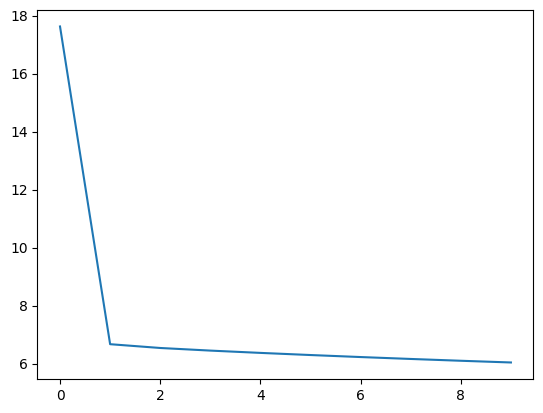

Metric score of optimizer SGD: 0.2837


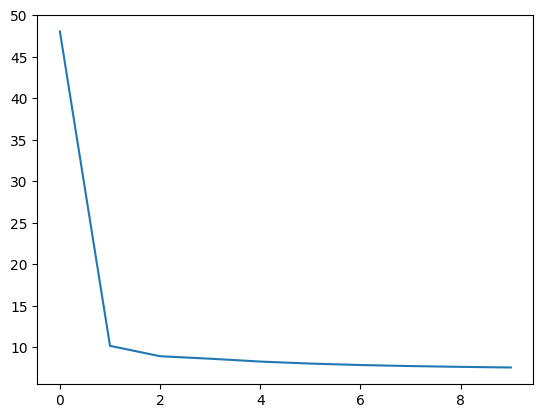

Metric score of optimizer Adam: 0.308


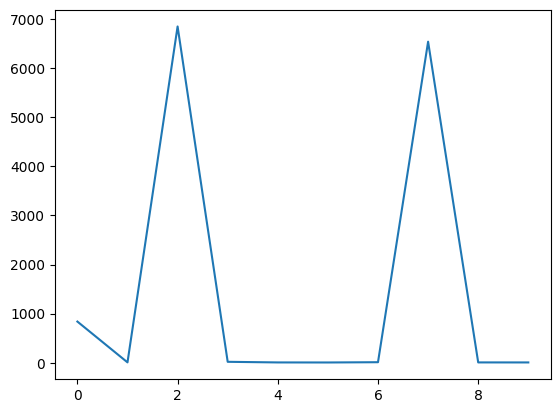

Metric score of optimizer LBFGS: 0.2767


In [3]:
params = CommonParams()

dataset_path = params.data_path / 'abalone' / 'abalone.data'
train_dataset = AbaloneDataset(dataset_path)
train_loader=DataLoader(train_dataset, batch_size=params.batch_size, shuffle=False)
test_dataset = AbaloneDataset(dataset_path, is_train=False)
test_loader=DataLoader(test_dataset, batch_size=params.batch_size, shuffle=False)


historyMap = defaultdict(list)
optimizerMap: dict[str, torch.nn.Module] = {
    'SGD': torch.optim.SGD,
    'Adam': torch.optim.Adam,
    'LBFGS': torch.optim.LBFGS
}

criterion = torch.nn.MSELoss(reduction='mean')
eval_metric = R2Score()

for optimizer_name, optimizer_init_function in optimizerMap.items():
    model = LinearRegression(*train_dataset.params)
    optimizer = optimizer_init_function(model.parameters(), params.learning_rate)
    lr_scheduler = torch.optim.lr_scheduler.LinearLR(optimizer, params.learning_rate)

    trainer = Trainer(params.num_epochs, model, criterion, optimizer, lr_scheduler, train_loader, test_loader, eval_metric)

    losses_history = trainer.train()
    historyMap[optimizer_name] = losses_history

    score = trainer.eval()

    plt.plot(losses_history)
    plt.show()
    print(f'Metric score of optimizer {optimizer_name}: {score:.4}')
